In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#from dash import Dash, dcc, html

In [2]:
#Sales Performance Analysis and Forecasting for E-commerce Business

In [3]:
df3=pd.read_csv(r"D:\Data archive\archive\product_details.csv")
df2=pd.read_csv(r"D:\Data archive\archive\customer_details.csv")
df=pd.read_csv(r"D:\Data archive\archive\E-commerece sales data 2024.csv")

Cleaning the df set

In [4]:

# Checking initial info of df
df.info()

# Dropping unnecessary column 'Unnamed: 4'
df.drop(columns=['Unnamed: 4'], inplace=True)

# Handling missing values (if any)
df['user id'] = df['user id'].fillna(df['user id'].mode()[0])  # Filling missing 'user id' with the mode value
df['product id'] = df['product id'].fillna(df['product id'].mode()[0])  # Filling missing 'product id' with mode value
df['Interaction type'] = df['Interaction type'].fillna(df['Interaction type'].mode()[0])  # Filling missing interaction type

# Converting 'Time stamp' column to datetime
#df['Time stamp'] = pd.to_datetime(df['Time stamp'])

# Final check after cleaning
df.info()

# Check for any remaining missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           3294 non-null   float64
 1   product id        3294 non-null   object 
 2   Interaction type  3294 non-null   object 
 3   Time stamp        2999 non-null   object 
dtypes: float64(1), object(3)
memory usage: 103.1+ KB
user id               0
product id            0
Interaction type     

In [5]:
df.head()

,user id,product id,Interaction type,Time stamp
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00


In [6]:
# Converting 'Time stamp' to datetime
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%d/%m/%Y %H:%M', errors='coerce')

# Extracting date and time
df['date'] = df['Time stamp'].dt.date
df['time'] = df['Time stamp'].dt.time

# Extracting hour from time
df['hour'] = df['Time stamp'].dt.hour

# Extracting day of the week
df['day_of_week'] = df['Time stamp'].dt.day_name()

# Extracting month
df['month'] = df['Time stamp'].dt.month_name()

# Extracting year
df['year'] = df['Time stamp'].dt.year

# Drop the original 'Time stamp' column
df.drop(columns=['Time stamp'], inplace=True)



In [7]:
# Check the updated DataFrame
print(df.head(10))

   user id                        product id Interaction type        date  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase  2023-10-10   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view  2023-10-11   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like  2023-10-12   
3      4.0  18018b6bc416dab347b1b7db79994afa             view  2023-10-13   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like  2023-10-14   
5      6.0  f8c32a45e507a177992973cf0d46d20c             like  2023-10-15   
6      7.0  40d3cd16b41970ae6872e914aecf2c8e         purchase  2023-10-16   
7      8.0  bc178f33a04dbccefa95b165f8b56830             view  2023-10-17   
8      9.0  cc2083338a16c3fe2f7895289d2e98fe             like  2023-10-18   
9     10.0  69828c5570dcdbd1609216d33fbad0db         purchase  2023-10-19   

       time  hour day_of_week    month    year  
0  08:00:00   8.0     Tuesday  October  2023.0  
1  08:00:00   8.0   Wednesday  October  2023.0  
2  08

Cleaning nd preprocessing the df2 set

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:

# Checking the initial info of df2
df2.info()

# Handling missing values
df2['Purchase Amount (USD)'] = pd.to_numeric(df2['Purchase Amount (USD)'], errors='coerce')  # Convert to numeric
df2['Purchase Amount (USD)'].fillna(df2['Purchase Amount (USD)'].mean(), inplace=True)  # Fill NaNs with mean value

# Final check after cleaning
df2.info()

# Check for any remaining missing values
print(df2.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_5468\1049205515.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Purchase Amount (USD)'].fillna(df2['Purchase Amount (USD)'].mean(), inplace=True)  # Fill NaNs with mean value


In [10]:
df2.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Cleaning df3 product details


In [11]:


# Checking initial info of df3
df3.info()

# Handling missing values
df3['Selling Price'] = pd.to_numeric(df3['Selling Price'], errors='coerce')  # Convert to numeric
df3['Selling Price'].fillna(df3['Selling Price'].mean(), inplace=True)  # Fill NaNs with mean value

# Fill missing 'Category' values with mode value (since it's a categorical column)
df3['Category'] = df3['Category'].fillna(df3['Category'].mode()[0])

# Final check after cleaning
df3.info()

# Check for any remaining missing values
print(df3.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniqe Id               10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_5468\168397886.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Selling Price'].fillna(df3['Selling Price'].mean(), inplace=True)  # Fill NaNs with mean value


In [12]:
df3.head(5)

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,NaN,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,NaN,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,NaN,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,NaN,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,NaN,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


Merging the data

In [13]:
# Merging Sales Data (`df`) with Customer Data (`df2`) based on 'user id'
merged_df = pd.merge(df, df2, left_on='user id', right_on='Customer ID', how='left')

# Merging the result with Product Data (`df3`) based on 'product id'
final_merged_df = pd.merge(merged_df, df3, left_on='product id', right_on='Uniqe Id', how='left')

# Checking the merged data
final_merged_df.info()

# Display first few rows of the final merged data
final_merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user id                 3294 non-null   float64
 1   product id              3294 non-null   object 
 2   Interaction type        3294 non-null   object 
 3   date                    2999 non-null   object 
 4   time                    2999 non-null   object 
 5   hour                    2999 non-null   float64
 6   day_of_week             2999 non-null   object 
 7   month                   2999 non-null   object 
 8   year                    2999 non-null   float64
 9   Customer ID             3294 non-null   int64  
 10  Age                     3294 non-null   int64  
 11  Gender                  3294 non-null   object 
 12  Item Purchased          3294 non-null   object 
 13  Category_x              3294 non-null   object 
 14  Purchase Amount (USD)   3294 non-null   

,user id,product id,Interaction type,date,time,hour,day_of_week,month,year,Customer ID,...,Product Url,Stock,Product Details,Dimensions,Color_y,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,2023-10-10,08:00:00,8.0,Tuesday,October,2023.0,1,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,2023-10-11,08:00:00,8.0,Wednesday,October,2023.0,2,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,2023-10-12,08:00:00,8.0,Thursday,October,2023.0,3,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,2023-10-13,08:00:00,8.0,Friday,October,2023.0,4,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,2023-10-14,08:00:00,8.0,Saturday,October,2023.0,5,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


Initial Exploration & Summary

In [14]:
# Basic statistical summary of the merged data
print(final_merged_df.describe())

# Checking for any duplicates in the merged data
print(f"Duplicates in data: {final_merged_df.duplicated().sum()}")

# Checking for missing values in the merged dataset
print(final_merged_df.isnull().sum())

# Display first few rows to inspect the merged data
final_merged_df.head()


           user id         hour         year  Customer ID          Age  \
count  3294.000000  2999.000000  2999.000000  3294.000000  3294.000000   
mean   1365.754402     8.901634  2022.975992  1365.754402    45.043412   
std     930.511864     1.212837     0.153099   930.511864    14.914890   
min       1.000000     0.000000  2022.000000     1.000000    18.000000   
25%     529.250000     8.000000  2023.000000   529.250000    32.000000   
50%    1352.500000     8.000000  2023.000000  1352.500000    47.000000   
75%    2175.750000    10.000000  2023.000000  2175.750000    56.000000   
max    2999.000000    10.000000  2023.000000  2999.000000    70.000000   

       Purchase Amount (USD)  Review Rating  Previous Purchases  Brand Name  \
count            3294.000000    3294.000000         3294.000000         0.0   
mean               59.057377       3.691591           24.604129         NaN   
std                22.788523       0.706582           14.147264         NaN   
min              

,user id,product id,Interaction type,date,time,hour,day_of_week,month,year,Customer ID,...,Product Url,Stock,Product Details,Dimensions,Color_y,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,2023-10-10,08:00:00,8.0,Tuesday,October,2023.0,1,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,2023-10-11,08:00:00,8.0,Wednesday,October,2023.0,2,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,2023-10-12,08:00:00,8.0,Thursday,October,2023.0,3,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,2023-10-13,08:00:00,8.0,Friday,October,2023.0,4,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,2023-10-14,08:00:00,8.0,Saturday,October,2023.0,5,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


some basic visualisations


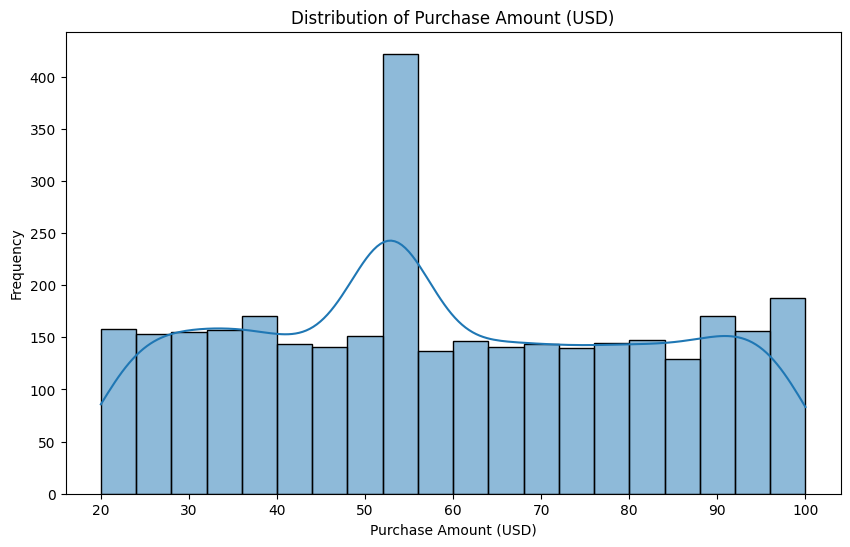

In [15]:
# Visualizing the distribution of Purchase Amount
# Histogram for Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['Purchase Amount (USD)'], bins=20, kde=True)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()


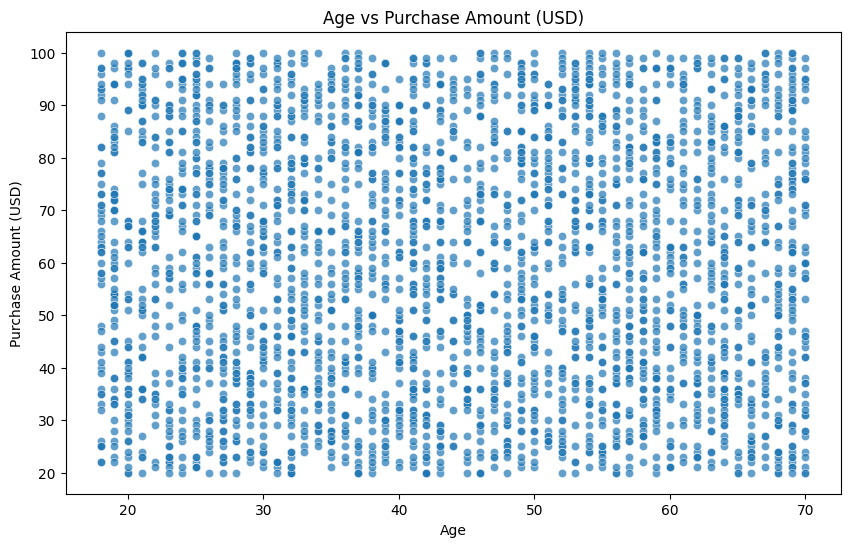

In [16]:
# Scatter plot for Age vs Purchase Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='Age', y='Purchase Amount (USD)', alpha=0.7)
plt.title('Age vs Purchase Amount (USD)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()


SALES ANALYSIS

Total sales per product

                                           Product Name  Purchase Amount (USD)
285   Banpresto 39652 Dragon Ball Super Blood of Sai...                  15682
2903  Wildkin Microfiber Nap Mat with Pillow for Tod...                    150
2370  Rubie's Women's Batman v Superman: Dawn of Jus...                    136
506   Ceaco Perfect Piece Count Puzzle - Thomas Kink...                    126
681        DC Super Hero Girls Batgirl 6" Action Figure                    100
2522  Star Wars: The Force Awakens Child's Stormtroo...                    100
535                    Childrens Christmas Bunny Jumper                    100
1447  J Concepts 3377B Tribute 2.6x3.6 Monster Truck...                    100
621   Creative Converting 991199 Graduation Cap Cuto...                    100
729                           Daron NYPD Police Car Set                    100


C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_5468\27253897.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_product_sorted.head(10), x='Product Name', y='Purchase Amount (USD)', palette='viridis')


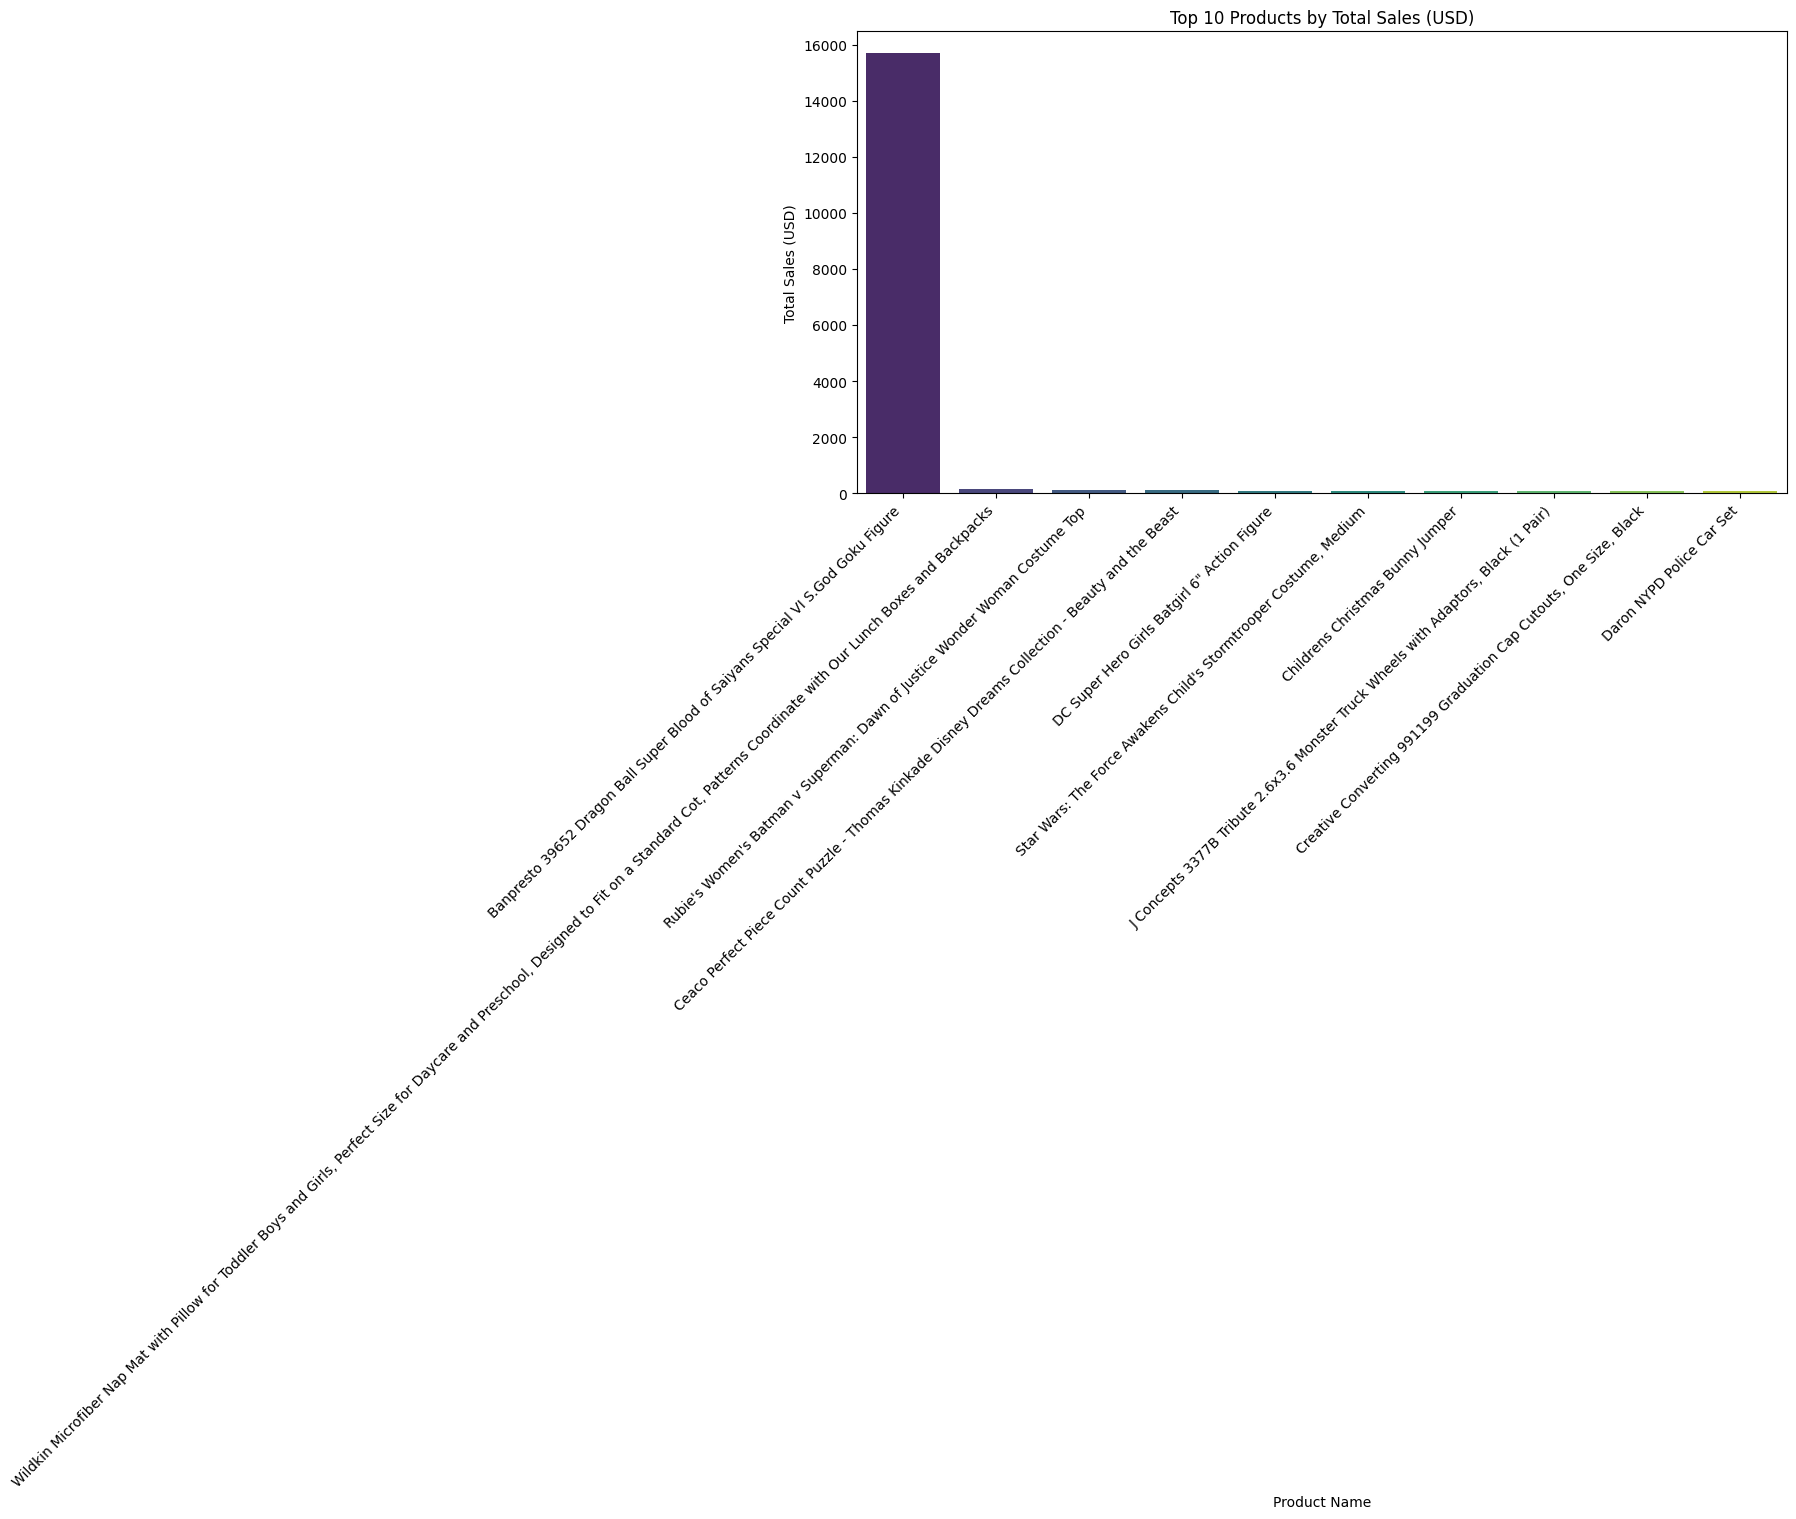

In [17]:
# Grouping by Product and summing the Purchase Amount
sales_per_product = final_merged_df.groupby('Product Name')['Purchase Amount (USD)'].sum().reset_index()

# Sorting products by sales
sales_per_product_sorted = sales_per_product.sort_values(by='Purchase Amount (USD)', ascending=False)

# Display the top 10 products by sales
print(sales_per_product_sorted.head(10))

# Plotting total sales for top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_per_product_sorted.head(10), x='Product Name', y='Purchase Amount (USD)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Total Sales (USD)')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.show()


Total Purchase per product

                                           Product Name  Purchase Amount (USD)
285   Banpresto 39652 Dragon Ball Super Blood of Sai...                    296
141                   Amscan Party Supplies, Multicolor                      2
506   Ceaco Perfect Piece Count Puzzle - Thomas Kink...                      2
1111  Fun World Zombie Fearleader Costume Cheerleade...                      2
2370  Rubie's Women's Batman v Superman: Dawn of Jus...                      2
2489  Sport Squad HX40 40 inch Table Top Air Hockey ...                      2
2903  Wildkin Microfiber Nap Mat with Pillow for Tod...                      2
4     "PAW Patrol Adventures" Blue Party Favor Plast...                      1
5     "Tampa Bay Lightning Collection" Bulk Cutout, ...                      1
6     #40 Celebration Candle | White/Red | Party Supply                      1


C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_5468\3805861142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchases_per_product_sorted.head(10), x='Product Name', y='Purchase Amount (USD)', palette='coolwarm')


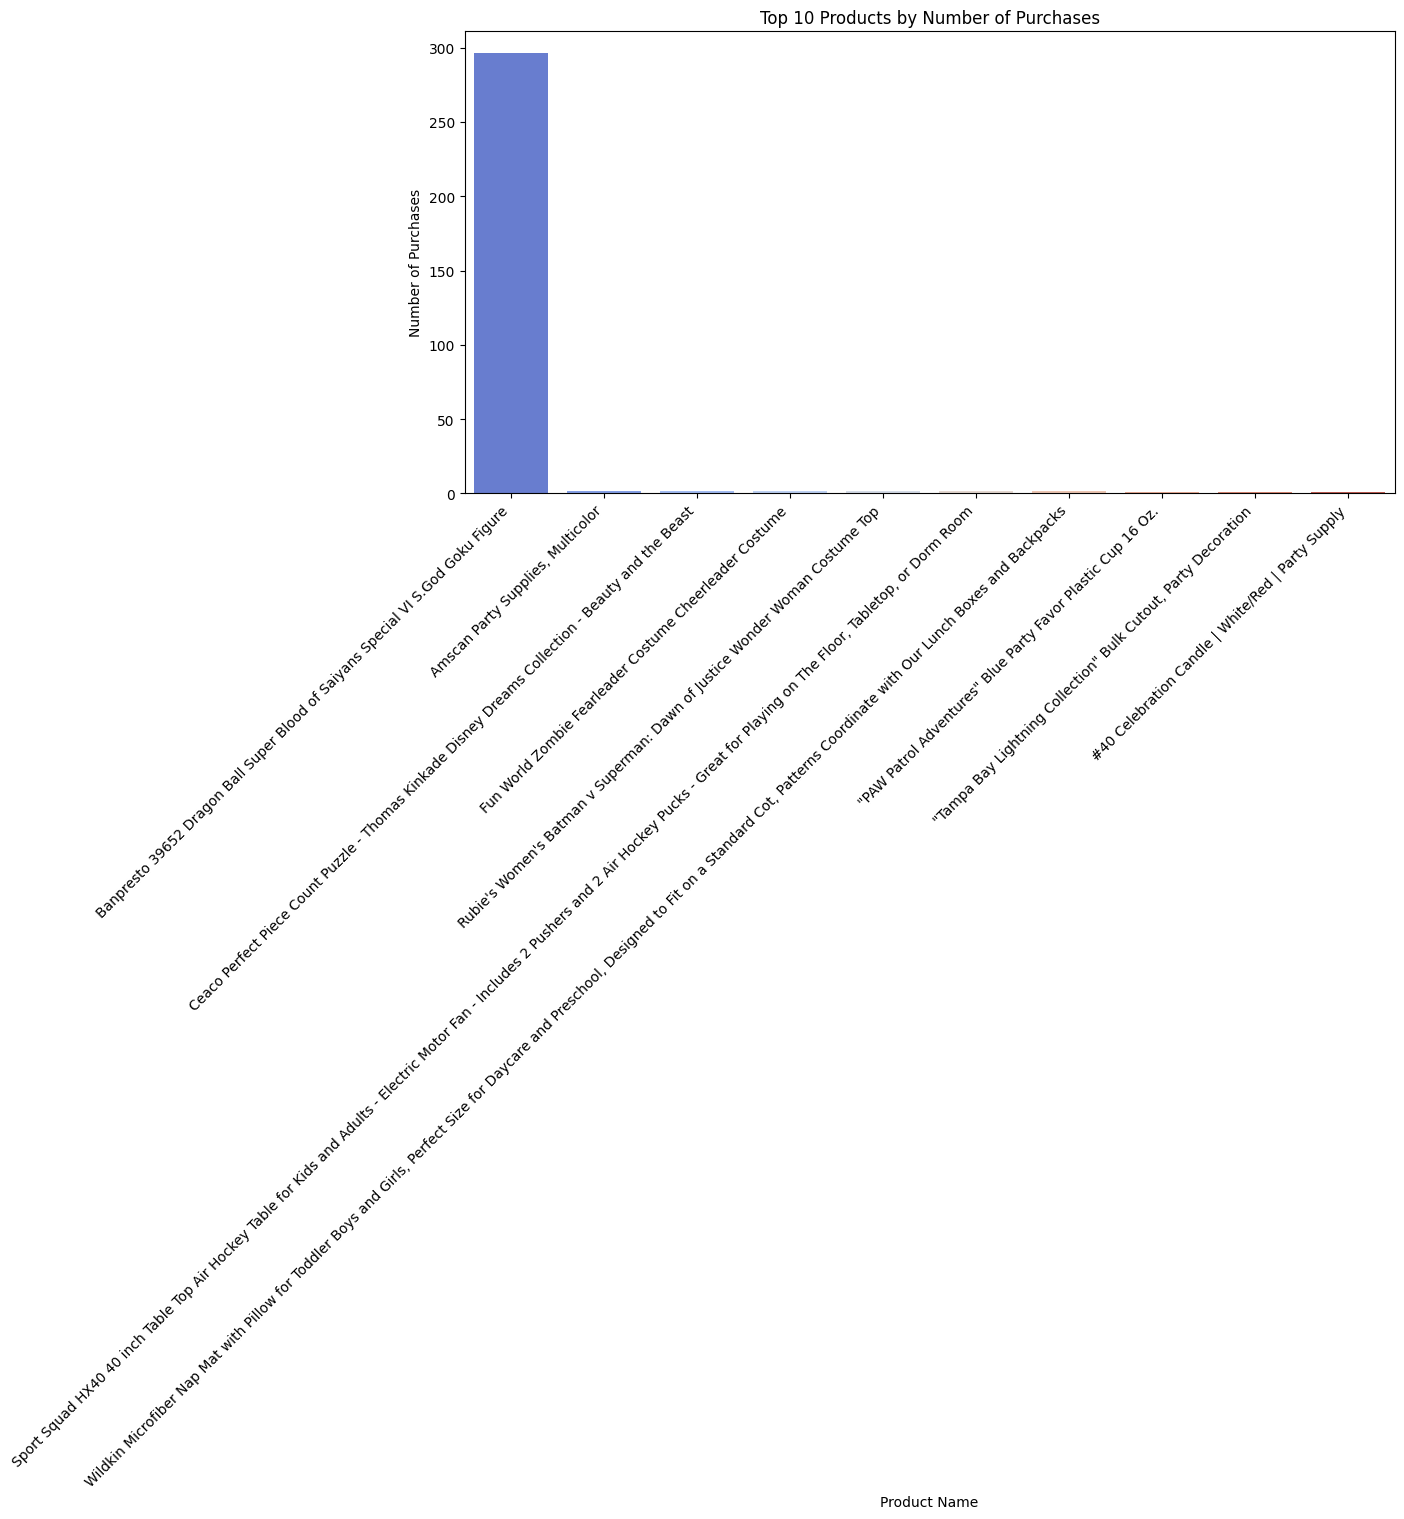

In [18]:
# Grouping by Product and counting the number of purchases (interactions)
purchases_per_product = final_merged_df.groupby('Product Name')['Purchase Amount (USD)'].count().reset_index()

# Sorting products by number of purchases
purchases_per_product_sorted = purchases_per_product.sort_values(by='Purchase Amount (USD)', ascending=False)

# Display the top 10 products by number of purchases
print(purchases_per_product_sorted.head(10))

# Plotting number of purchases for top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(data=purchases_per_product_sorted.head(10), x='Product Name', y='Purchase Amount (USD)', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products by Number of Purchases')
plt.xlabel('Product Name')
plt.ylabel('Number of Purchases')
plt.show()


Customer Demographic Analysis

Age distribution

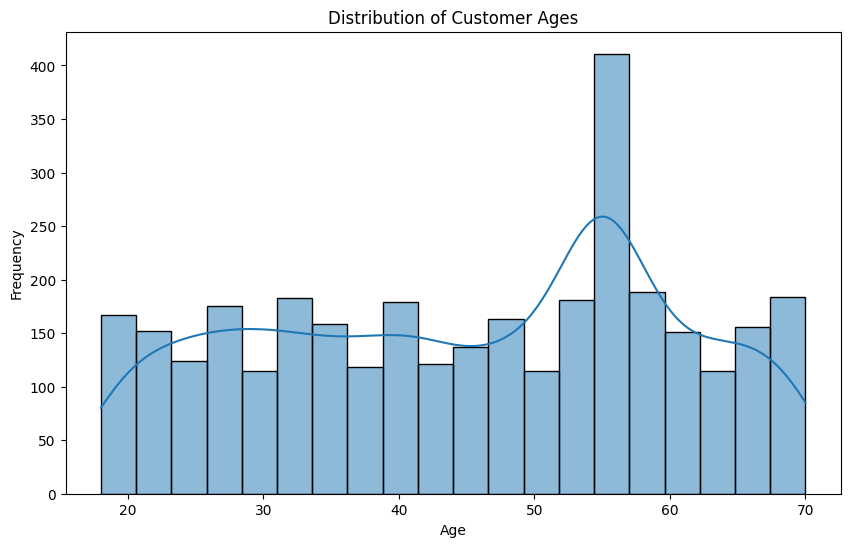

In [19]:
# Plotting the distribution of customer ages
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['Age'], kde=True, bins=20)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Gender Distribution

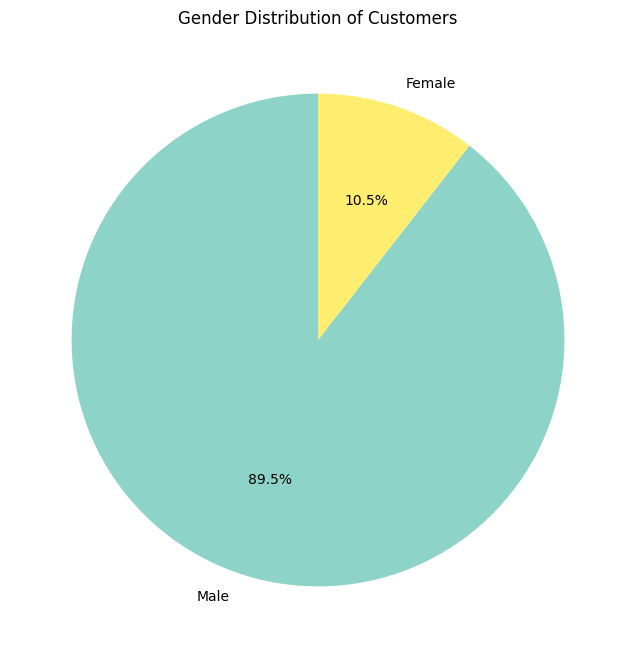

In [20]:
# Gender distribution in the dataset
gender_distribution = final_merged_df['Gender'].value_counts()

# Plotting a pie chart for gender distribution
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()


Sales trend over time

In [21]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user id                 3294 non-null   float64
 1   product id              3294 non-null   object 
 2   Interaction type        3294 non-null   object 
 3   date                    2999 non-null   object 
 4   time                    2999 non-null   object 
 5   hour                    2999 non-null   float64
 6   day_of_week             2999 non-null   object 
 7   month                   2999 non-null   object 
 8   year                    2999 non-null   float64
 9   Customer ID             3294 non-null   int64  
 10  Age                     3294 non-null   int64  
 11  Gender                  3294 non-null   object 
 12  Item Purchased          3294 non-null   object 
 13  Category_x              3294 non-null   object 
 14  Purchase Amount (USD)   3294 non-null   

Monthly sales trend

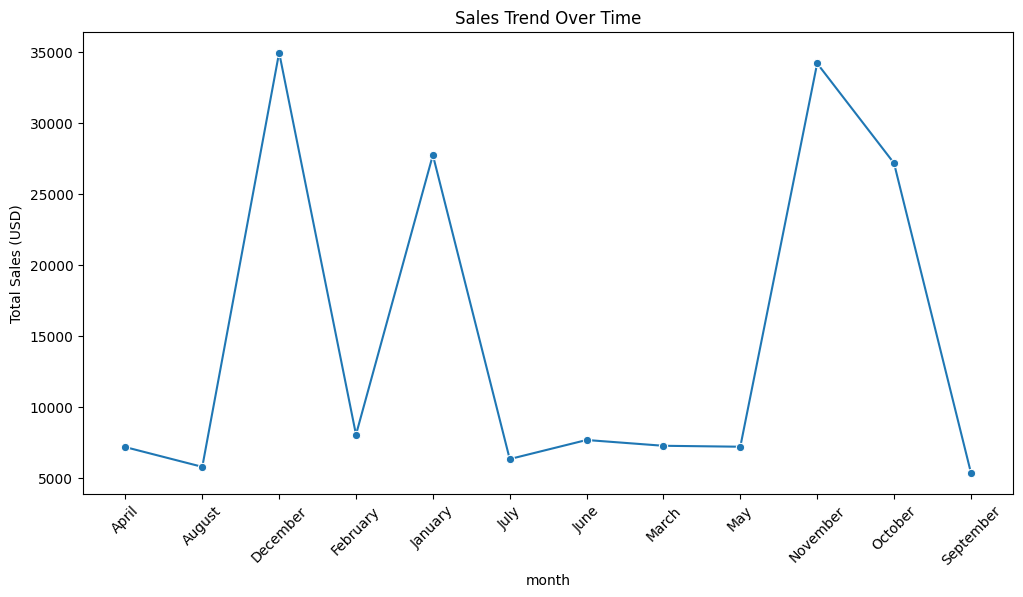

In [22]:
# Extracting year and month for time series analysis

# Grouping by year and month to calculate total sales
monthly_sales = final_merged_df.groupby('month')['Purchase Amount (USD)'].sum().reset_index()

# Plotting the sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='Purchase Amount (USD)', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


Customer Purchase Behaviour

Frequency of purchase

C:\Users\Saurav Kumar\AppData\Local\Temp\ipykernel_5468\1975201694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette='Blues')


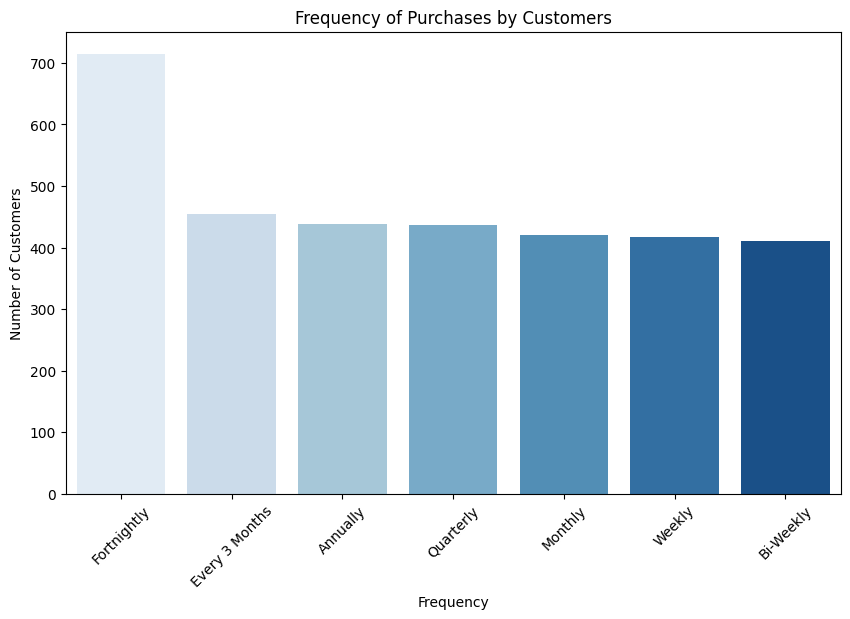

In [23]:
# Count of each frequency of purchase
purchase_frequency = final_merged_df['Frequency of Purchases'].value_counts()

# Plotting a bar plot for purchase frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_frequency.index, y=purchase_frequency.values, palette='Blues')
plt.title('Frequency of Purchases by Customers')
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


Analyzing previous purchases

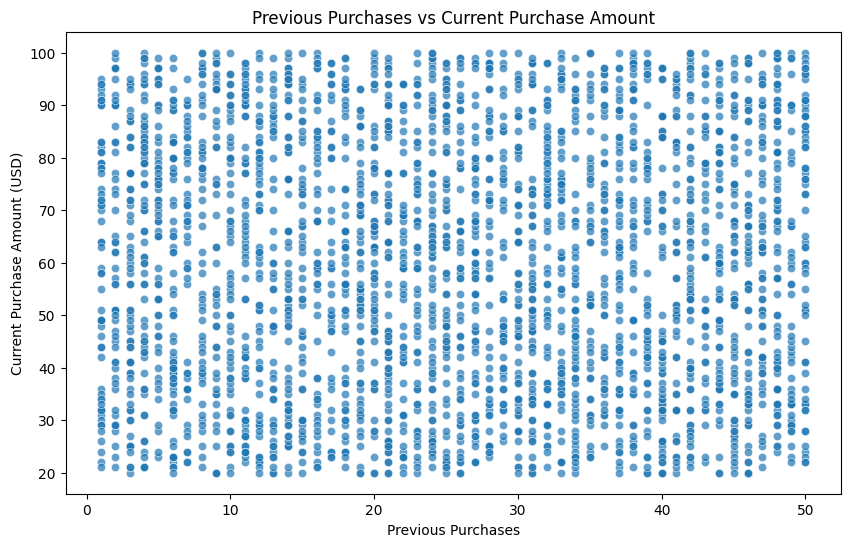

In [24]:
# Scatter plot between Previous Purchases and Current Purchase Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='Previous Purchases', y='Purchase Amount (USD)', alpha=0.7)
plt.title('Previous Purchases vs Current Purchase Amount')
plt.xlabel('Previous Purchases')
plt.ylabel('Current Purchase Amount (USD)')
plt.show()


Sales Forecasting

Data prep for forecasting we are going to use ARIMA Model

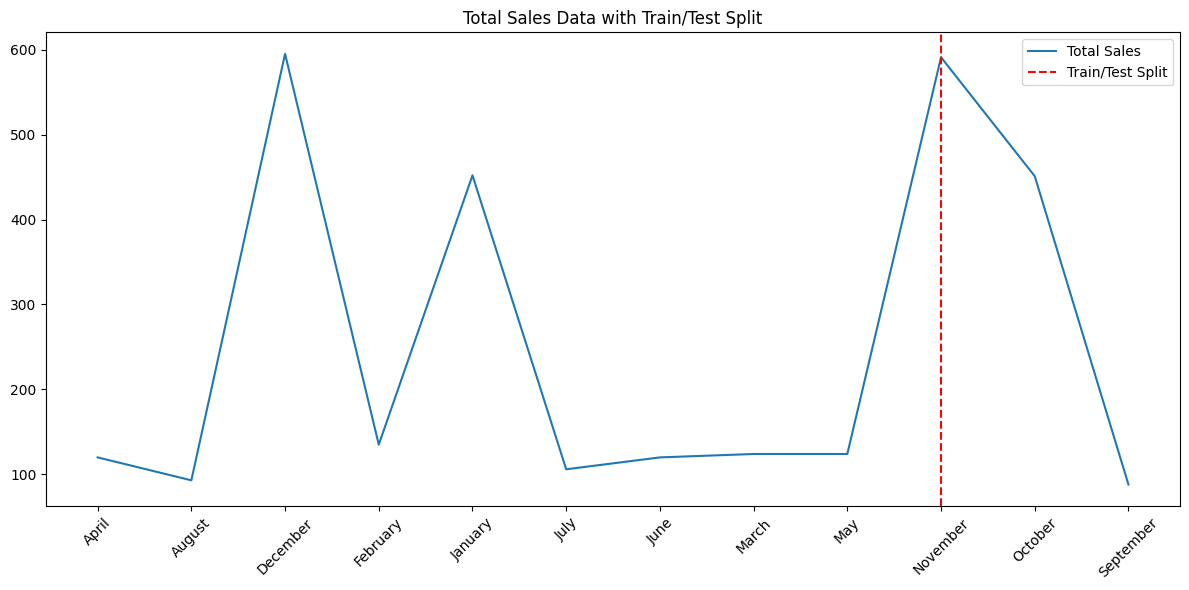

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Aggregate sales data by month

monthly_sales = df.groupby('month').size()

# Split data into training and test sets (80% training, 20% testing)
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Visualize the training and test data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Total Sales')
plt.axvline(x=train_size, color='r', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title('Total Sales Data with Train/Test Split')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ARIMA Model Training
ARIMA (AutoRegressive Integrated Moving Average) is a popular model for time series forecasting

c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Saur

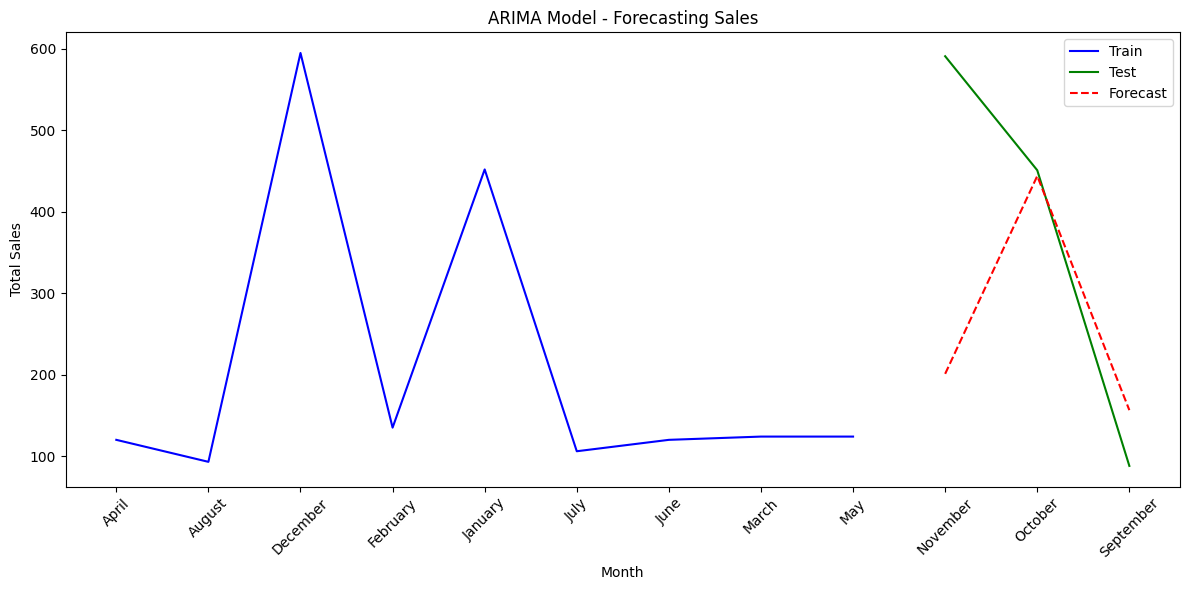

Mean Absolute Error (MAE): 155.150204315472


In [26]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p, d, q) with p=5, d=1, q=0
model_fit = model.fit()

# Forecasting on the test set
forecast = model_fit.forecast(steps=len(test))

# Plotting the training, test data, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index.astype(str), train.values, label='Train', color='blue')
plt.plot(test.index.astype(str), test.values, label='Test', color='green')
plt.plot(test.index.astype(str), forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Model - Forecasting Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model Evaluation (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error (MAE): {mae}')


Model Evaluation and Improvements

Evaluate the Model (Residuals and AIC)

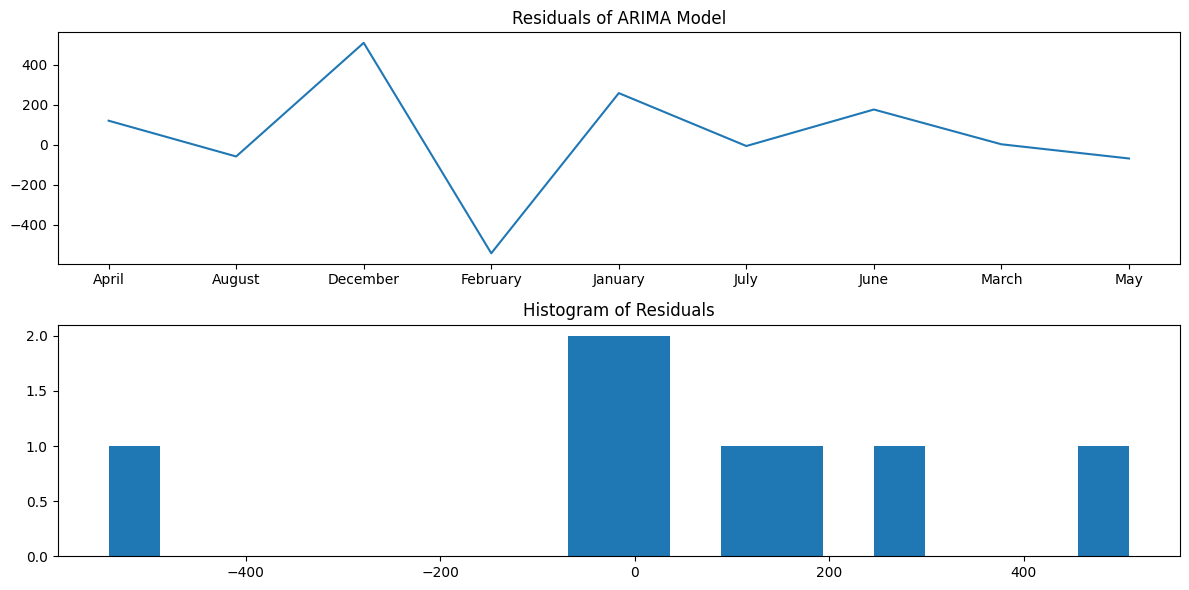

AIC: 154.90685133058506


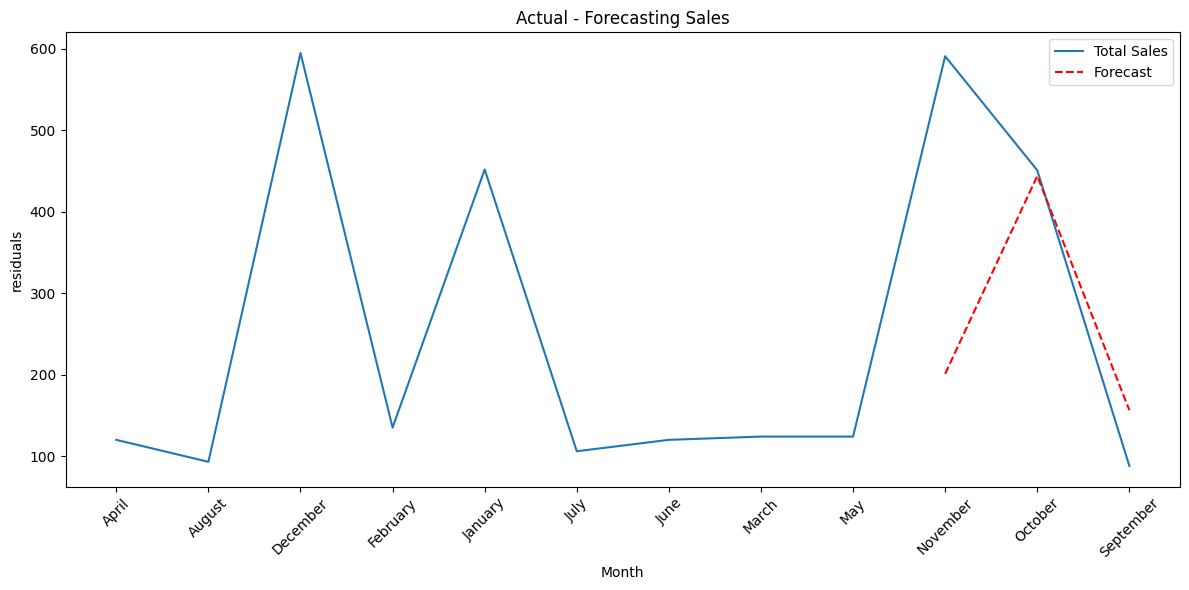

In [27]:
# Evaluate the model residuals abd AIC
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.subplot(212)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()
# AIC value
print(f'AIC: {model_fit.aic}')
# Plotting the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Total Sales')
plt.plot(test.index.astype(str), forecast, label='Forecast', color='red', linestyle='--')
plt.title('Actual - Forecasting Sales')
plt.xlabel('Month')
plt.ylabel('residuals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Evaluation

error matrics

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 155.150204315472
Mean Squared Error (MSE): 52266.69715452657
Root Mean Squared Error (RMSE): 228.61910933805723


Forecasting future Sales

In [29]:
# Forecast the next n months (e.g., next 6 months)
forecast_steps = 6  # Adjust the number of steps for future forecasting
future_forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(f"Forecasted Sales for next {forecast_steps} months: {future_forecast}")


Forecasted Sales for next 6 months: 9     201.045295
10    443.957125
11    156.453033
12    504.739001
13     18.854272
14    222.218530
Name: predicted_mean, dtype: float64


c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Saurav Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
type(future_forecast)

pandas.core.series.Series

Visualising Forecast

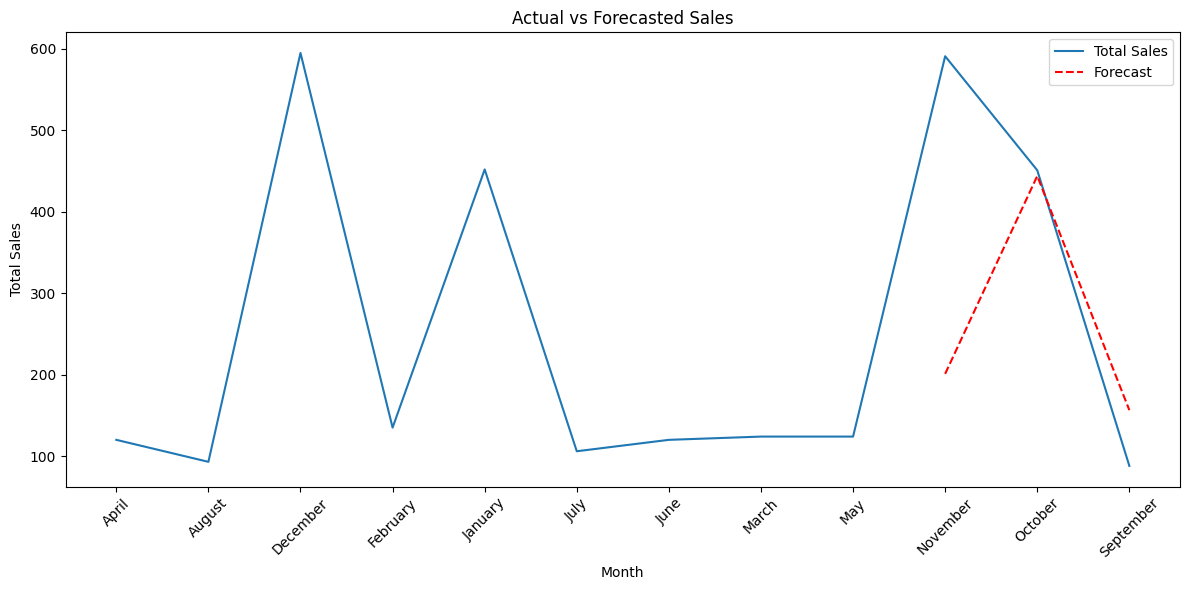

In [31]:

# Plotting the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, label='Total Sales')
plt.plot(test.index.astype(str), forecast, label='Forecast', color='red', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:

# Aggregate sales by Month
#df_sales = final_merged_df.groupby("month")["Purchase Amount (USD)"].sum().reset_index()

# Save to CSV
#df_sales.to_csv("your_sales_data.csv", index=False)

print("✅ df_sales saved as 'your_sales_data.csv'")



✅ df_sales saved as 'your_sales_data.csv'
